### Importing the libraries

In [29]:
import tensorflow as tf
tf.__version__
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import load_model

### load dataset

In [2]:
from tensorflow.keras.datasets import mnist
(trainX, trainY), (testX, testY) = mnist.load_data()
testY_copy =  testY

### reshape dataset to have a single channel

In [3]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

### one hot encode target values

In [4]:
from tensorflow.keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)

### convert from integers to floats

In [5]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')

### normalize to range 0-1

In [6]:
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
trainX = train_norm
testX = test_norm

### Initialising the CNN

In [7]:
cnn = tf.keras.models.Sequential()

### Convolution

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

### Batch Normalization

In [9]:
from tensorflow.keras.layers import BatchNormalization
cnn.add(BatchNormalization())

### Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Second Convolution Layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Again Batch Normalization

In [14]:
cnn.add(BatchNormalization())

### Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

### Compiling the CNN

In [16]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                        

### Training the CNN & Evaluating on the test set

In [28]:
history = cnn.fit(trainX, trainY, epochs=15, batch_size=32, validation_data=(testX, testY))

Epoch 1/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0307 - val_accuracy: 0.9925
Epoch 2/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0363 - val_accuracy: 0.9913
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0355 - val_accuracy: 0.9907
Epoch 4/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0356 - val_accuracy: 0.9918
Epoch 5/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0348 - val_accuracy: 0.9918
Epoch 6/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0349 - val_accuracy: 0.9916
Epoch 7/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0356 - va

In [30]:
_, acc = cnn.evaluate(testX, testY)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.0414 - accuracy: 0.9921
> 99.210


In [32]:
cnn.save('myModel.h5')

In [33]:
loaded_model = tf.keras.models.load_model('myModel.h5')

# or model = load_model('my_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


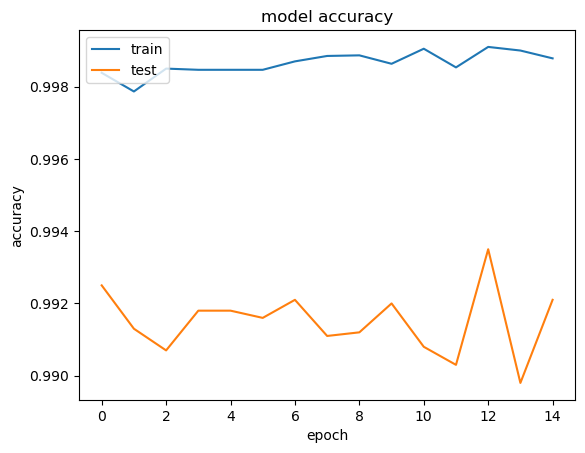

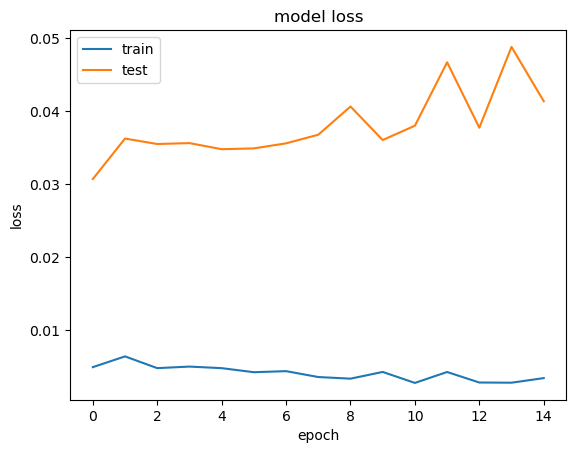

In [36]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
y_pred = cnn.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)
print(testY_copy)
print(testY_copy.shape)
print(y_pred_classes)
print(y_pred_classes.shape)

[7 2 1 ... 4 5 6]
(10000,)
[7 2 1 ... 4 5 6]
(10000,)


In [38]:
confusion_mtx = confusion_matrix(testY_copy, y_pred_classes)
print(confusion_mtx)

[[ 975    0    1    0    0    0    1    2    1    0]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   2    1 1024    0    0    0    0    4    1    0]
 [   0    0    0 1003    0    6    0    0    1    0]
 [   0    0    0    0  975    0    1    0    1    5]
 [   2    0    0    5    0  884    1    0    0    0]
 [   4    2    1    0    1    2  946    0    2    0]
 [   0    3    2    0    0    0    0 1023    0    0]
 [   2    0    0    3    1    0    0    0  967    1]
 [   1    0    0    0    5    3    0    8    1  991]]


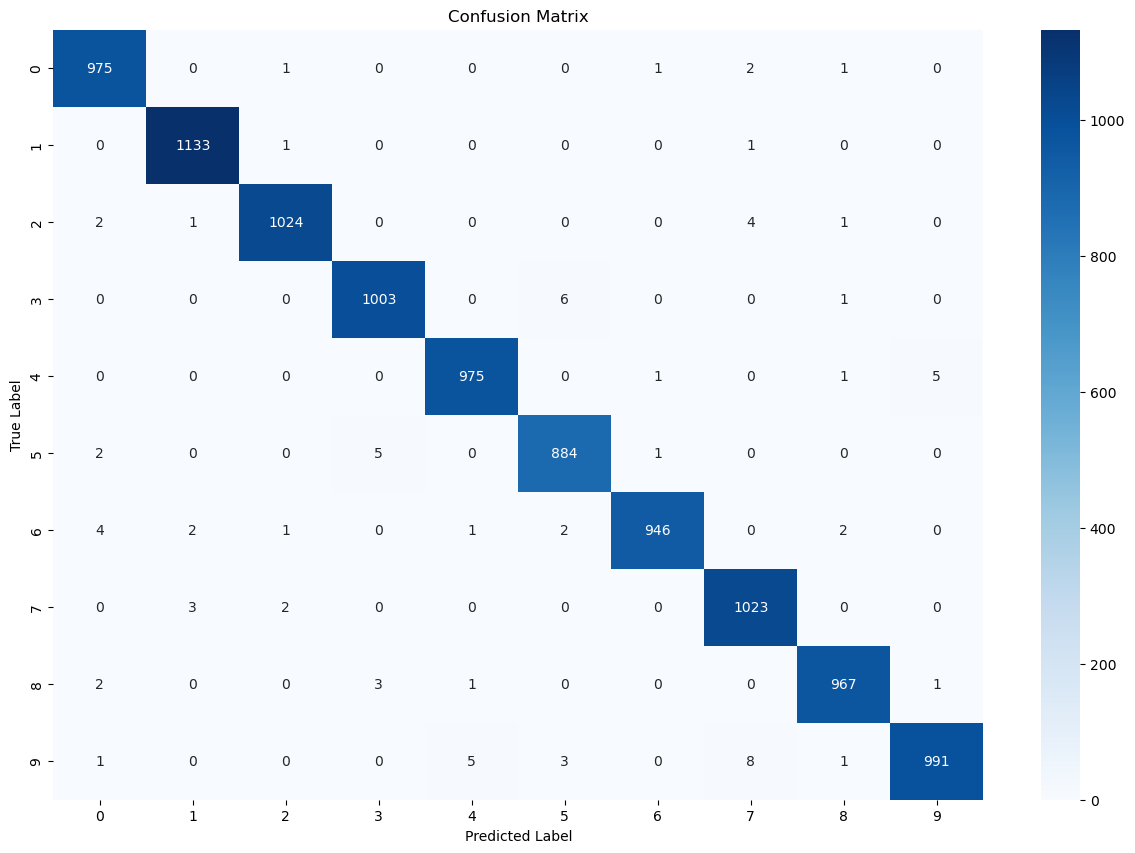

In [39]:
# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');